In [29]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
from sklearn import metrics
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA


In [30]:
# Load clean data set
clean_data= pd.read_csv("/Users/sa20/Desktop/Music-Recommendation-Lab/Data/processed/clean_data.csv")
clean_data.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.0
1,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.0
3,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.0
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.0


## K-Means Clustering w/ No Scaling

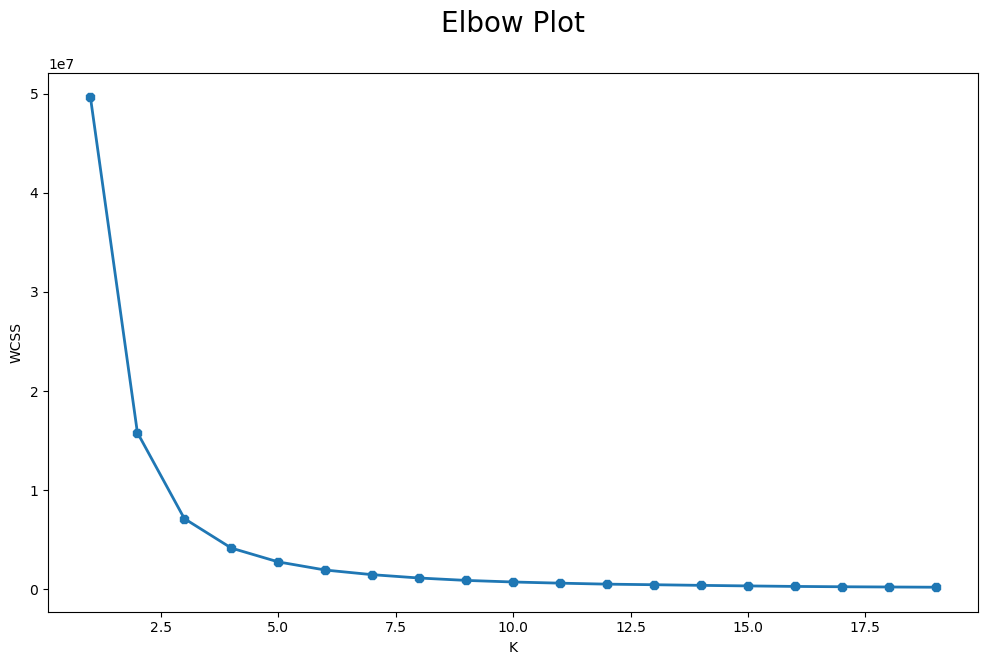

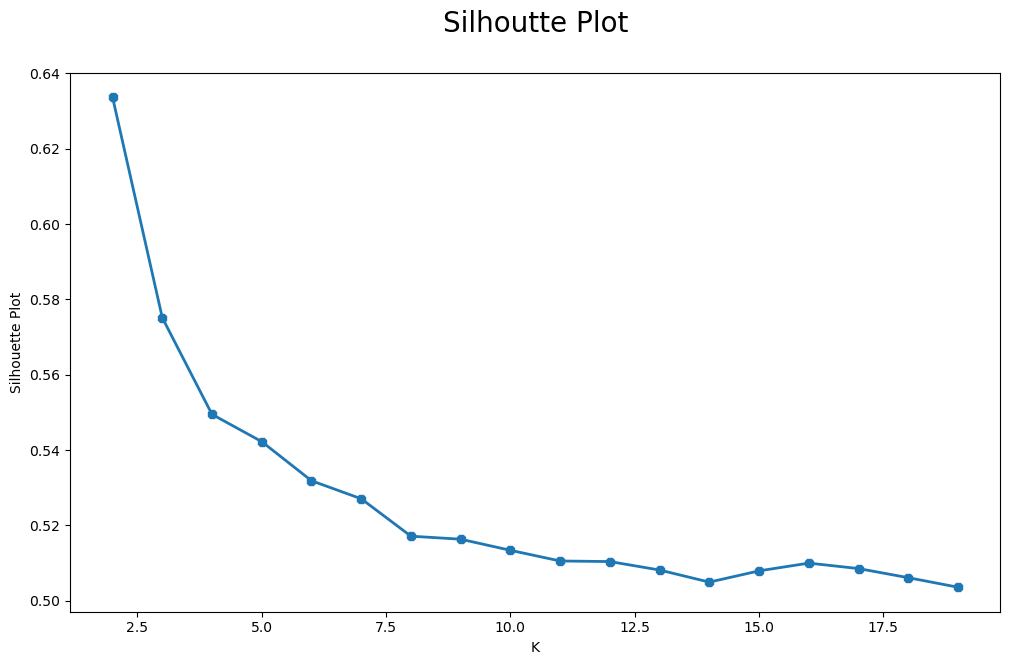

In [31]:
# Create an Elbow Plot of WCSS (within-cluster-sum-of-squares)


X1 = clean_data.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

wcss= []
for k in range(1, 20):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

# Plot
plt.figure(figsize = (12, 7))

plt.plot(range(1, 20), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()



# Create a Silhoutte Score
silhouette = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    predictions = kmeans.fit_predict(X1)
    silhouette.append(metrics.silhouette_score(X1, predictions))


plt.figure(figsize = (12, 7))

plt.plot(range(2, 20), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Plot')
plt.show()

#### Based on our Elbow and Silhouette plot, our ideal number of clusters is k=4

In [105]:
# Make a Kmeans model to identify 4 unique clusters in the dataset
kmeans =  KMeans(n_clusters= 4, random_state= 42)


# Fit the KMeans model to 'X1' 
kmeans.fit(X1)

KMeans(n_clusters=4, random_state=42)

In [106]:
labels= kmeans.fit_predict(X1)
labels

array([1, 3, 0, ..., 3, 3, 3], dtype=int32)

In [107]:
# Output of Centroids
kmeans.cluster_centers_

array([[3.42498444e+01, 2.13486962e-02, 9.46779985e-02, 1.41381949e-01,
        6.08756628e-02, 1.35034956e-02, 1.61291964e-02, 7.29629019e-02,
        8.24924532e-02, 4.17101657e-02, 7.06303433e-02, 3.14654092e-02,
        5.18502819e-02, 2.40997422e-02, 1.59506742e-01, 3.31241052e-02,
        5.05462708e-01],
       [1.04206047e+02, 2.01896261e-02, 1.47306219e-01, 1.06203190e-01,
        5.53340042e-02, 2.13334378e-02, 1.80546408e-02, 3.13014058e-02,
        7.15976090e-02, 1.22020537e-01, 5.26466705e-02, 5.91141716e-02,
        4.65577274e-02, 2.53046772e-02, 1.06468872e-01, 3.08235438e-02,
        3.47800469e-01],
       [1.65010211e+02, 1.79921707e-02, 1.12080663e-01, 7.25768432e-02,
        3.71850118e-02, 2.50734452e-02, 1.63057804e-02, 1.75166285e-02,
        6.33795880e-02, 3.20473518e-01, 3.52276822e-02, 6.76516709e-02,
        3.48665731e-02, 2.29470807e-02, 4.43391233e-02, 2.47649314e-02,
        3.03841291e-01],
       [6.56051690e+01, 2.23144823e-02, 1.26459192e-01, 1.239

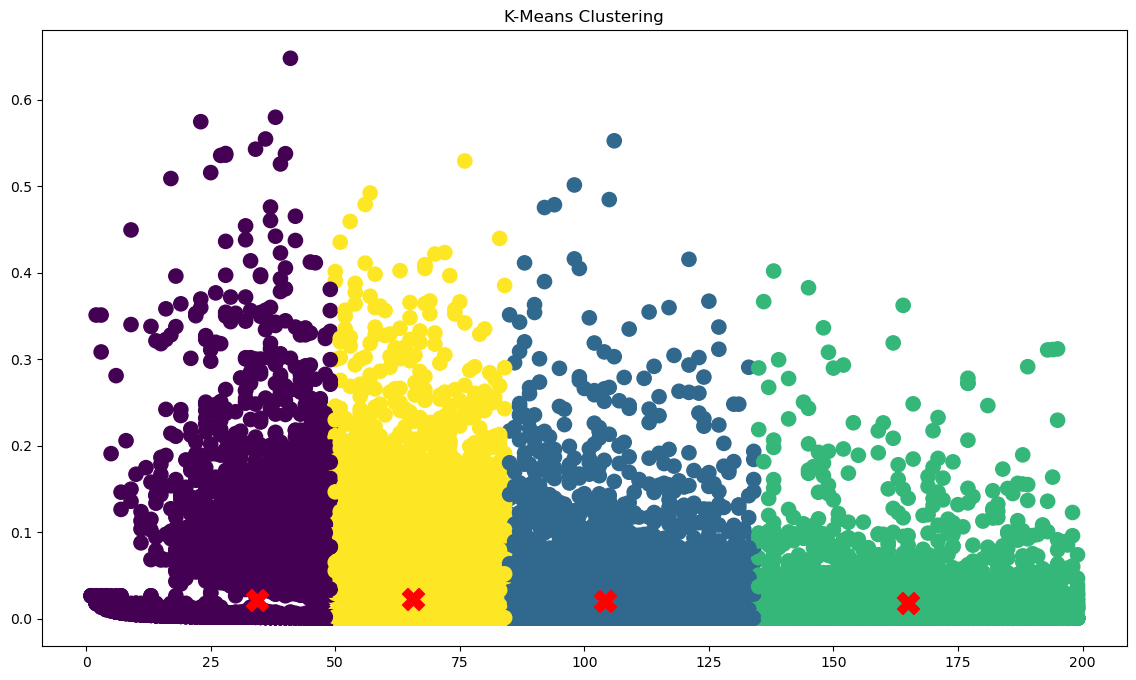

In [108]:
plt.figure(figsize=(14,8))
plt.scatter(X1 [:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color= "red", s = 250, marker='X', label="Centroids")
plt.title("K-Means Clustering")
plt.xlabel('')
plt.ylabel('')
plt.show()

##### This graph demonstrates that we have 4 distinct clusters, but the grouping is not uniform as we don't know how many features were used in the clustering process

## K-Means Clustering Scaled

In [36]:
# Scaler makes sure variables have equal range
scaler = StandardScaler()

# Fit Kmeans object
X1_scaled = scaler.fit_transform(X1)

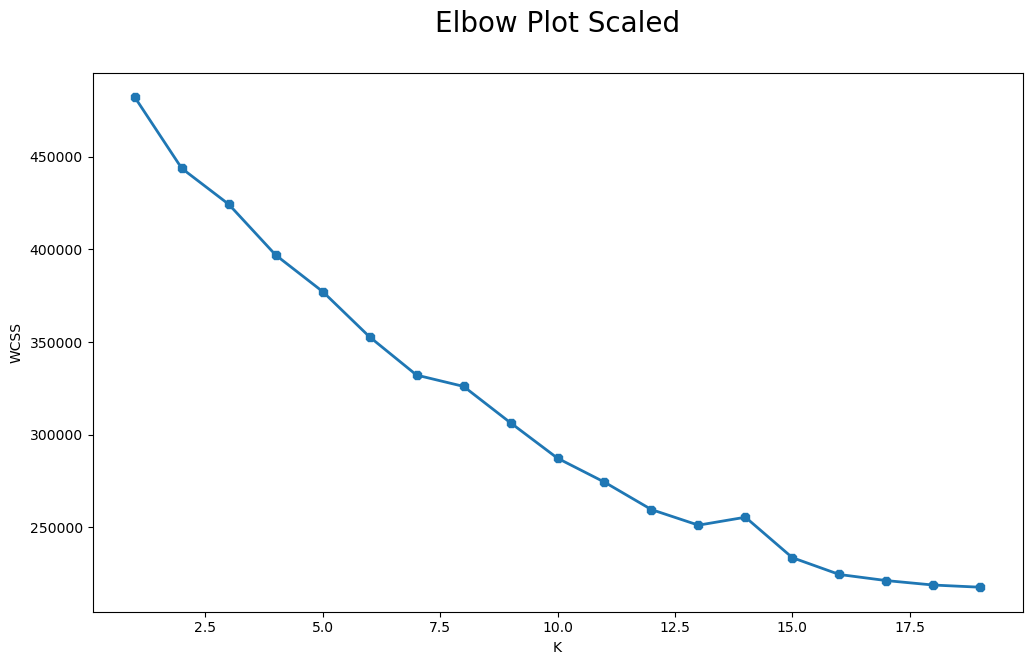

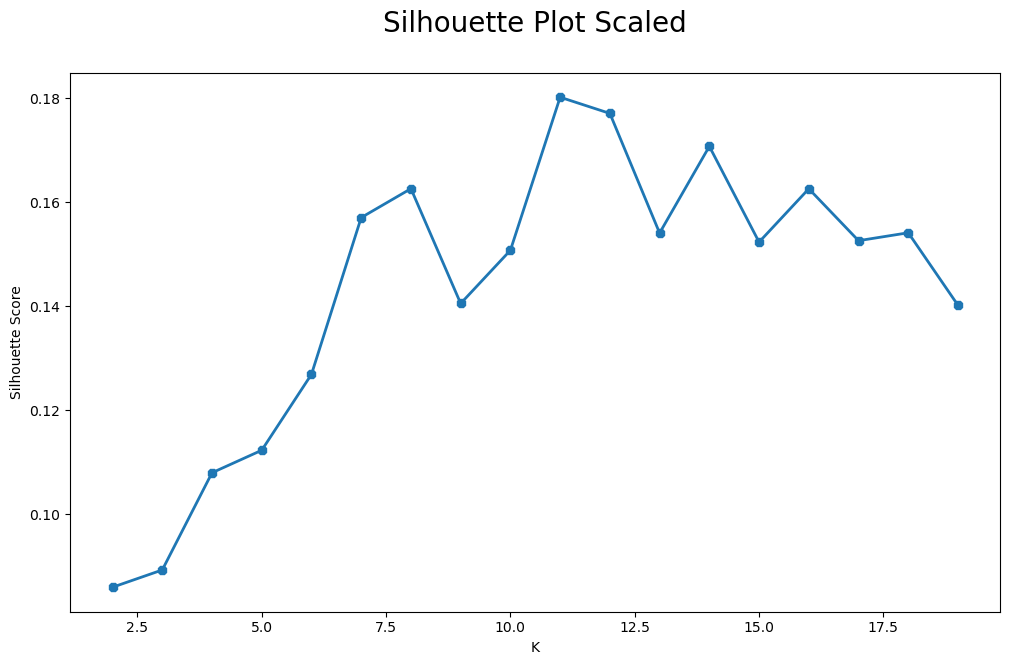

In [37]:
wcss_scaled = []

for k in range(1,20):

    kmeans = KMeans(n_clusters= k, init= "k-means++")

    kmeans.fit(X1_scaled)

    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize=(12,7))

plt.plot(range(1,20), wcss_scaled, linewidth= 2, marker ="8")
plt.title("Elbow Plot Scaled\n", fontsize= 20)
plt.xlabel('K')
plt.ylabel("WCSS")
plt.show()

# Create Silhouette Plot for Silhouette Score
silhouette_scaled = []
for k in range(2, 20):

    kmeans = KMeans(n_clusters= k, init= "k-means++")

    predictions = kmeans.fit_predict(X1_scaled)
    silhouette_scaled.append(metrics.silhouette_score(X1_scaled, predictions))

plt.figure(figsize=(12, 7))

plt.plot(range(2, 20), silhouette_scaled, linewidth= 2, marker='8')
plt.title('Silhouette Plot Scaled\n', fontsize=20)
plt.xlabel('K')
plt.ylabel("Silhouette Score")
plt.show()

#### After looking at the scaled elbow and silhouette plots, I went with k=12 as the optimal number of clusters

In [132]:
kmeans_scaled= KMeans(n_clusters=12, init="k-means++", n_init=50, random_state=42)
kmeans_scaled.fit(X1_scaled)

KMeans(n_clusters=12, n_init=50, random_state=42)

In [133]:
# Label your Scaled data
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([4, 0, 8, ..., 9, 9, 9], dtype=int32)

In [134]:
# Output of Centroids
kmeans_scaled.cluster_centers_

array([[-2.79543086e-01, -1.96021155e-01, -4.18885841e-01,
         1.84259827e+00, -2.18623636e-01, -1.87411708e-01,
        -1.70732738e-01, -1.69818185e-01,  8.59197059e-02,
        -4.09751280e-01, -2.49315773e-01, -2.66552973e-01,
         1.09470817e-01,  1.36934646e-01, -3.41370785e-01,
        -9.79409723e-02,  8.66138889e-02],
       [ 1.27042398e-01, -2.30942028e-01,  8.64112596e-02,
        -1.19347517e-01, -2.00109178e-01, -1.92451559e-01,
        -8.74708557e-02, -2.69376981e-01, -4.18896075e-01,
        -1.27349527e-02, -1.48021695e-01,  2.87656753e+00,
        -2.15478295e-01, -1.01286014e-01, -2.64278494e-01,
        -2.48871069e-01,  2.76751019e-02],
       [-9.05373509e-02,  5.87908672e-02, -3.86630489e-01,
        -3.46147399e-01, -1.28416596e-01,  7.27547514e-03,
        -4.14205211e-02, -1.79899623e-01,  2.39551860e-02,
        -3.04138733e-01, -2.32165948e-01, -1.20589056e-01,
        -1.95892213e-01, -1.19851598e-01, -3.48688877e-01,
         4.73679036e+00,  1.1

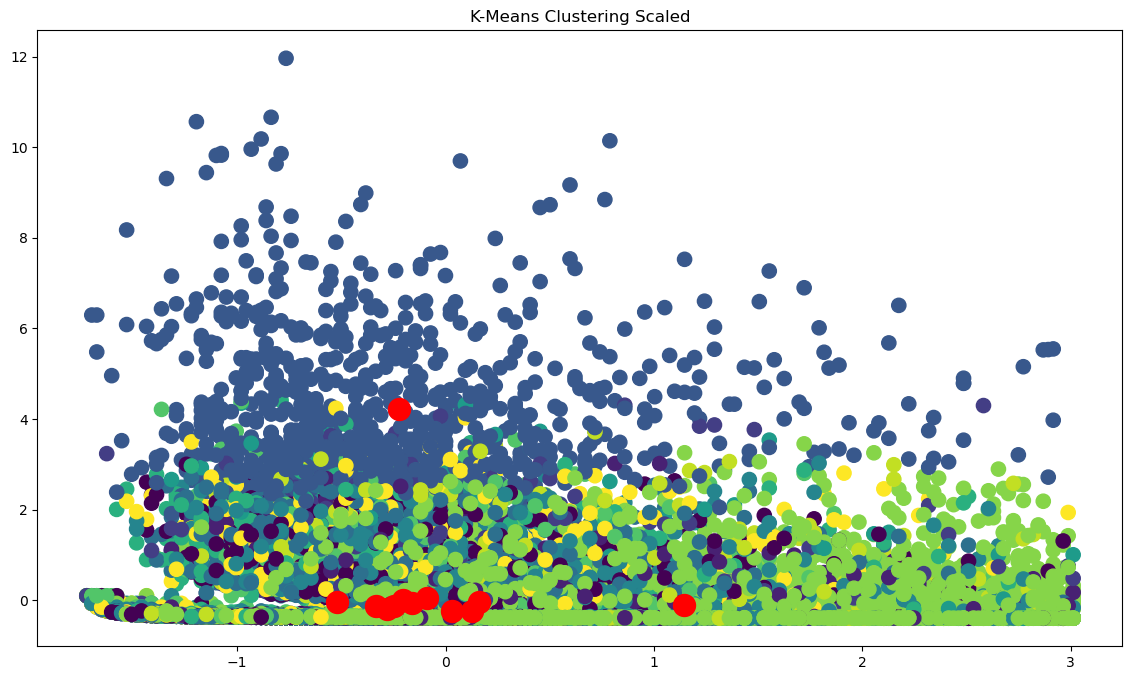

In [135]:
plt.figure(figsize=(14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s=105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color="red", s=250)
plt.title('K-Means Clustering Scaled')
plt.xlabel('')
plt.ylabel('')
plt.show()

##### After scaling, our clusters are non-existent or it appears to be that way due to an exceesive amount of overlapping making it hard to interpret what exactly it is that I'm looking at

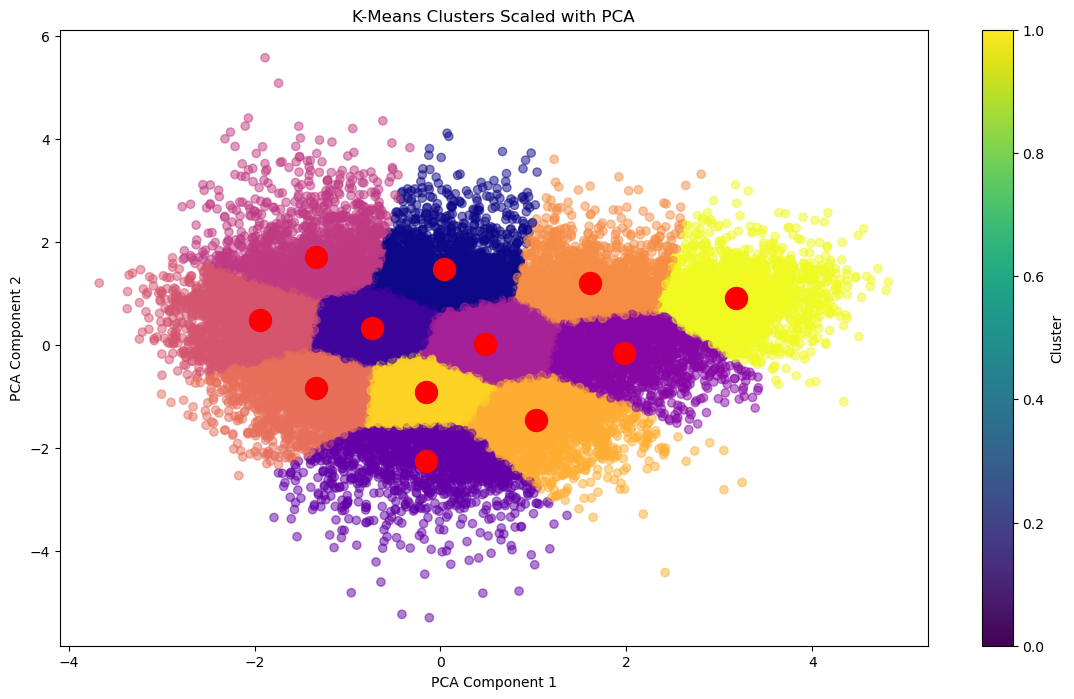

In [136]:
# Set-up PCA and Standardize data
pca = PCA(n_components=2)
x_pca= pca.fit_transform(X1_scaled)

clusters = kmeans_scaled.fit_predict(x_pca)

# Plot
plt.figure(figsize=(14, 8))

plt.scatter(x_pca[:, 0], x_pca[:, 1], c = clusters, cmap="plasma", alpha = 0.5)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color="red", s=250)
plt.title("K-Means Clusters Scaled with PCA")
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

##### PCA helped us achieve our much desired result as we can clearly see twelve distinct clusters! Each point represents a song and each one of our twelve clusters is represented by a different color

In [137]:
# Add "Cluster" column to clean dataset, use scaled data KMeans with scaled data that was visualized with PCA
clean_data['Cluster'] = kmeans_scaled.fit_predict(X1_scaled)

In [154]:
# Load the raw dataset, then add categorical columns to clean dataset
raw_data= pd.read_csv("/Users/sa20/Desktop/Music-Recommendation-Lab/Data/raw/train.csv")

label = raw_data[['genre', 'artist_name', 'track_name', 'release_date']]

label= pd.concat([label, clean_data], axis=1)

label

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,pop,mukesh,mohabbat bhi jhoothi,1950,95,0.000598,0.063746,0.000598,0.000598,0.000598,...,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.380299,0.117175,1.000000,4
1,pop,frankie laine,i believe,1950,51,0.035537,0.096777,0.443435,0.001284,0.001284,...,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,1.000000,0
2,pop,johnnie ray,cry,1950,24,0.002770,0.002770,0.002770,0.002770,0.002770,...,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.225422,1.000000,8
3,pop,pérez prado,patricia,1950,54,0.048249,0.001548,0.001548,0.001548,0.021500,...,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.225889,0.001548,1.000000,7
4,pop,giorgos papadopoulos,apopse eida oneiro,1950,48,0.001350,0.001350,0.417772,0.001350,0.001350,...,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.068800,0.001350,1.000000,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28357,hip hop,mack 10,10 million ways,2019,78,0.001350,0.001350,0.001350,0.001350,0.001350,...,0.001350,0.391651,0.001350,0.435089,0.001350,0.001350,0.065664,0.001350,0.014286,1
28358,hip hop,m.o.p.,ante up (robbin hoodz theory),2019,67,0.001284,0.001284,0.035338,0.001284,0.001284,...,0.203889,0.318910,0.058152,0.134955,0.001284,0.001284,0.001284,0.001284,0.014286,9
28359,hip hop,nine,whutcha want?,2019,77,0.001504,0.154302,0.168988,0.001504,0.039755,...,0.001504,0.356685,0.001504,0.068684,0.001504,0.001504,0.001504,0.001504,0.014286,9
28360,hip hop,will smith,switch,2019,67,0.001196,0.001196,0.001196,0.001196,0.048359,...,0.001196,0.492434,0.103614,0.001196,0.202659,0.001196,0.001196,0.001196,0.014286,9


In [139]:
# Explore value count of each cluster
clean_data['Cluster'].value_counts().sort_index().to_frame(name='Count')

,Count
Cluster,
0,4359
1,1798
2,781
3,884
4,4902
5,4586
6,812
7,1593
8,2118


In [141]:
# Investigate clusters
label[clean_data['Cluster'] == 0].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
3047,pop,frankie goes to hollywood,war,1984,100,0.000797,0.000797,0.311173,0.000797,0.065828,...,0.052762,0.203102,0.000797,0.000797,0.000797,0.128040,0.038150,0.137748,0.514286,0
5051,pop,bryan adams,here i am,2002,27,0.001880,0.001880,0.474398,0.207227,0.038204,...,0.001880,0.001880,0.001880,0.001880,0.001880,0.103988,0.001880,0.001880,0.257143,0
11640,country,gaither vocal band,"sweet, sweet spirit",2007,80,0.000923,0.000923,0.336901,0.000923,0.000923,...,0.000923,0.000923,0.000923,0.173428,0.000923,0.082097,0.181587,0.000923,0.185714,0
23687,rock,the who,it's not true,1965,22,0.003096,0.077865,0.346043,0.003096,0.003096,...,0.416974,0.003096,0.003096,0.003096,0.003096,0.112679,0.003096,0.003096,0.785714,0
9595,country,ronnie milsap,suburbia,1984,80,0.001170,0.001170,0.419532,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.048092,0.489848,0.001170,0.001170,0.024984,0.514286,0
8655,country,ronnie milsap,please don't tell me how the story ends,1974,29,0.002024,0.161886,0.434543,0.002024,0.002024,...,0.258824,0.002024,0.050158,0.002024,0.002024,0.002024,0.002024,0.002024,0.657143,0
11490,country,gary allan,life ain't always beautiful,2005,65,0.000923,0.027748,0.358449,0.000923,0.000923,...,0.000923,0.000923,0.000923,0.130981,0.000923,0.000923,0.117435,0.000923,0.214286,0
3550,pop,bad religion,i want something more,1989,39,0.003289,0.003289,0.507217,0.003289,0.003289,...,0.003289,0.003289,0.156210,0.003289,0.003289,0.003289,0.110483,0.003289,0.442857,0
27266,rock,imagine dragons,yesterday,2017,28,0.002105,0.002105,0.766905,0.076910,0.002105,...,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,0.002105,0.042857,0
17119,jazz,dean martin,if,1951,35,0.002024,0.002024,0.391003,0.088453,0.069328,...,0.002024,0.002024,0.002024,0.002024,0.360966,0.061910,0.002024,0.002024,0.985714,0


In [155]:
clean_data['Cluster'].value_counts().sort_index().to_frame(name='Number of Songs')

,Number of Songs
Cluster,
0,4359
1,1798
2,781
3,884
4,4902
5,4586
6,812
7,1593
8,2118


In [156]:
# Define the column names for the dataset
columns = ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience',
           'family/gospel', 'romantic', 'communication', 'obscene', 'music',
           'movement/places', 'light/visual perceptions', 'family/spiritual',
           'sadness', 'feelings', 'age']


# Create a DataFrame of the cluster centers  
cluster_centers = pd.DataFrame(kmeans_scaled.cluster_centers_, columns=columns)


# Label the index with the cluster names
cluster_centers.index = [f"Cluster {i}" for i in range(len(cluster_centers))]
cluster_centers


,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
Cluster 0,-0.279543,-0.196021,-0.418886,1.842598,-0.218624,-0.187412,-0.170733,-0.169818,0.085920,-0.409751,-0.249316,-0.266553,0.109471,0.136935,-0.341371,-0.097941,0.086614
Cluster 1,0.127042,-0.230942,0.086411,-0.119348,-0.200109,-0.192452,-0.087471,-0.269377,-0.418896,-0.012735,-0.148022,2.876568,-0.215478,-0.101286,-0.264278,-0.248871,0.027675
Cluster 2,-0.090537,0.058791,-0.386630,-0.346147,-0.128417,0.007275,-0.041421,-0.179900,0.023955,-0.304139,-0.232166,-0.120589,-0.195892,-0.119852,-0.348689,4.736790,0.112007
Cluster 3,-0.222809,4.232914,-0.331131,-0.165880,0.027556,-0.019563,-0.032103,0.049520,-0.275864,-0.148083,-0.033266,-0.313079,-0.290159,-0.202068,-0.018477,-0.052289,0.302212
Cluster 4,-0.332636,-0.126861,-0.442690,-0.365249,-0.206181,-0.193724,-0.171090,-0.130482,0.212855,-0.425299,-0.242619,-0.283743,0.056108,-0.062265,1.742199,-0.131965,0.073115
Cluster 5,0.031111,-0.231716,1.817846,-0.366859,-0.227614,-0.179780,-0.162022,-0.259134,0.021894,-0.386723,-0.294697,-0.229174,0.175218,0.218127,-0.407802,-0.150825,-0.266916
Cluster 6,-0.161741,-0.065043,-0.063051,-0.080124,-0.073875,-0.076745,4.393248,-0.097186,-0.265794,-0.112242,-0.048742,-0.158926,-0.281505,0.041661,-0.119503,-0.105275,0.273170
Cluster 7,-0.523356,-0.033724,-0.512965,-0.301976,-0.164511,-0.162066,-0.102305,3.386342,0.043410,-0.455129,-0.170049,-0.304833,0.125387,-0.148235,-0.292984,-0.110247,0.643879
Cluster 8,-0.247824,-0.137062,-0.459264,-0.413836,-0.222485,-0.180116,-0.060389,-0.199182,-0.085488,-0.390367,2.907010,-0.075012,0.215667,0.102674,-0.373077,-0.144263,0.409646
Cluster 9,1.142930,-0.108917,-0.335921,-0.439288,-0.277145,0.032405,-0.103131,-0.331539,-0.025284,2.093756,-0.301363,0.004652,-0.228035,-0.131976,-0.567699,-0.185673,-0.508769


In [157]:
#Create a dictionary for top 3 features of each cluster
top_cluster_features = {}

# Loop through each cluster and get the top 3 features
for i in range(len(cluster_centers)):
    top_cluster_features[f"Cluster {i}"] = cluster_centers.iloc[i].sort_values(ascending=False).head(3).index.tolist()

top_cluster_features

{'Cluster 0': ['world/life', 'family/spiritual', 'light/visual perceptions'],
 'Cluster 1': ['movement/places', 'len', 'violence'],
 'Cluster 2': ['feelings', 'age', 'dating'],
 'Cluster 3': ['dating', 'age', 'romantic'],
 'Cluster 4': ['sadness', 'communication', 'age'],
 'Cluster 5': ['violence', 'family/spiritual', 'light/visual perceptions'],
 'Cluster 6': ['family/gospel', 'age', 'family/spiritual'],
 'Cluster 7': ['romantic', 'age', 'light/visual perceptions'],
 'Cluster 8': ['music', 'age', 'light/visual perceptions'],
 'Cluster 9': ['obscene', 'len', 'shake the audience'],
 'Cluster 10': ['shake the audience', 'len', 'obscene'],
 'Cluster 11': ['night/time', 'age', 'communication']}

In [158]:
# Cluster 1
label[clean_data['Cluster'] == 1]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
37,pop,t. m. soundararajan,ethanai periya,1953,74,0.001253,0.066192,0.335708,0.001253,0.027847,...,0.001253,0.001253,0.001253,0.382074,0.001253,0.055239,0.001253,0.001253,0.957143,1
49,pop,harry belafonte,mark twain,1954,64,0.002392,0.002392,0.002392,0.002392,0.002392,...,0.002392,0.002392,0.378403,0.370635,0.115315,0.002392,0.002392,0.002392,0.942857,1
50,pop,harry belafonte,the next big river,1954,112,0.001645,0.375904,0.172299,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.238618,0.001645,0.001645,0.001645,0.001645,0.942857,1
65,pop,ted heath,take the “a” train,1956,199,0.000516,0.000516,0.000516,0.000516,0.000516,...,0.136611,0.304397,0.020922,0.483828,0.000516,0.000516,0.000516,0.000516,0.914286,1
83,pop,harry belafonte,matilda,1956,92,0.000822,0.031876,0.000822,0.000822,0.054284,...,0.000822,0.416615,0.109557,0.257021,0.000822,0.000822,0.000822,0.000822,0.914286,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28318,hip hop,afroman,crazy rap (colt 45 & 2 zig zags),2019,140,0.027323,0.000572,0.000572,0.024718,0.000572,...,0.000572,0.364163,0.025880,0.287471,0.099398,0.000572,0.000572,0.000572,0.014286,1
28326,hip hop,big k.r.i.t.,king of the south,2019,68,0.001032,0.001032,0.052178,0.001032,0.001032,...,0.001032,0.354437,0.001032,0.420015,0.103657,0.001032,0.001032,0.001032,0.014286,1
28350,hip hop,nappy roots,blowin' trees,2019,74,0.001196,0.125810,0.353286,0.001196,0.001196,...,0.001196,0.040241,0.153930,0.207573,0.001196,0.001196,0.001196,0.001196,0.014286,1
28355,hip hop,nappy roots,country boyz,2019,109,0.000810,0.000810,0.000810,0.000810,0.000810,...,0.000810,0.394272,0.000810,0.515379,0.000810,0.000810,0.000810,0.000810,0.014286,1


In [146]:
# Cluster 4
label[clean_data['Cluster'] == 4].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
9660,country,dolly parton,i walk the line,1984,98,0.000543,0.000543,0.000543,0.233481,0.000543,...,0.066225,0.000543,0.000543,0.000543,0.000543,0.000543,0.524050,0.000543,0.514286,4
8064,country,johnny cash,pack up your sorrows,1967,32,0.002193,0.002193,0.002193,0.067550,0.002193,...,0.407428,0.002193,0.002193,0.052219,0.002193,0.002193,0.439909,0.002193,0.757143,4
8160,country,merle haggard,is this the beginning of the end?,1968,27,0.001949,0.001949,0.001949,0.001949,0.001949,...,0.001949,0.001949,0.001949,0.048475,0.001949,0.001949,0.708024,0.001949,0.742857,4
21019,reggae,derrick harriott,the loser,1970,55,0.001196,0.001196,0.134283,0.001196,0.001196,...,0.001196,0.001196,0.001196,0.001196,0.001196,0.233015,0.330667,0.001196,0.714286,4
393,pop,sam cooke,jamaica farewell,1960,50,0.001253,0.001253,0.001253,0.001253,0.001253,...,0.001253,0.001253,0.090316,0.001253,0.229958,0.001253,0.394257,0.001253,0.857143,4
20340,jazz,between the buried and me,parallax,2012,27,0.003096,0.003096,0.003096,0.141385,0.003096,...,0.003096,0.003096,0.003096,0.003096,0.355433,0.003096,0.397384,0.003096,0.114286,4
13238,blues,small faces,runaway,1967,54,0.001284,0.001284,0.001284,0.001284,0.001284,...,0.219861,0.001284,0.001284,0.001284,0.001284,0.062591,0.490043,0.120595,0.757143,4
18198,jazz,bobbi humphrey,please set me at ease,1975,42,0.001548,0.001548,0.001548,0.001548,0.001548,...,0.001548,0.001548,0.001548,0.001548,0.001548,0.001548,0.807260,0.166424,0.642857,4
9196,country,don williams,falling again,1980,48,0.001284,0.001284,0.001284,0.158432,0.001284,...,0.162254,0.001284,0.001284,0.001284,0.001284,0.142218,0.335439,0.001284,0.571429,4
23736,rock,the beatles,sgt. pepper's lonely hearts club band (reprise),1967,44,0.001595,0.001595,0.001595,0.001595,0.001595,...,0.001595,0.273226,0.147433,0.001595,0.001595,0.001595,0.553822,0.001595,0.757143,4


In [153]:
# Cluster 8
label[clean_data['Cluster'] == 8].sample(10)

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
11063,country,bill monroe,uncle pen,1999,45,0.001645,0.001645,0.001645,0.146054,0.001645,...,0.113207,0.001645,0.386148,0.001645,0.099402,0.033345,0.168349,0.001645,0.300000,8
8690,country,jim reeves,you belong to me,1975,43,0.001754,0.001754,0.001754,0.001754,0.001754,...,0.079984,0.001754,0.555146,0.001754,0.271193,0.001754,0.001754,0.001754,0.642857,8
22463,reggae,groundation,the dragon,2006,148,0.000605,0.026052,0.118133,0.000605,0.027214,...,0.068622,0.000605,0.311475,0.175992,0.097607,0.000605,0.060904,0.000605,0.200000,8
9227,country,alabama,mountain music,1980,84,0.000923,0.000923,0.000923,0.000923,0.018484,...,0.000923,0.000923,0.352937,0.097088,0.253176,0.000923,0.036420,0.000923,0.571429,8
24622,rock,the clash,rock the casbah,1982,53,0.002506,0.002506,0.002506,0.002506,0.002506,...,0.002506,0.002506,0.446436,0.177479,0.002506,0.002506,0.002506,0.002506,0.542857,8
15348,blues,phish,water in the sky,1998,28,0.002632,0.002632,0.002632,0.002632,0.002632,...,0.002632,0.002632,0.352021,0.002632,0.603242,0.002632,0.002632,0.002632,0.314286,8
14504,blues,gary moore,listen to your heartbeat,1985,109,0.000560,0.000560,0.079441,0.000560,0.000560,...,0.000560,0.000560,0.399811,0.000560,0.000560,0.000560,0.314030,0.000560,0.500000,8
10840,country,dolly parton,medley:,1997,88,0.000993,0.000993,0.000993,0.032862,0.000993,...,0.000993,0.000993,0.452691,0.273931,0.000993,0.000993,0.094279,0.000993,0.328571,8
7087,country,lester flatt,cabin on the hill,1952,33,0.003289,0.003289,0.003289,0.003289,0.003289,...,0.003289,0.003289,0.311636,0.003289,0.003289,0.003289,0.404497,0.003289,0.971429,8
20854,jazz,digitalluc,003,2018,73,0.001504,0.092588,0.001504,0.001504,0.001504,...,0.001504,0.356358,0.349987,0.001504,0.001504,0.001504,0.001504,0.001504,0.028571,8


In [150]:
# Cluster 11
label[clean_data['Cluster'] == 11]

,genre,artist_name,track_name,release_date,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
11,pop,the chordettes,carolina moon,1951,38,0.001645,0.001645,0.001645,0.397490,0.001645,...,0.066201,0.001645,0.093699,0.001645,0.417938,0.001645,0.001645,0.001645,0.985714,11
25,pop,lata mangeshkar,paas nahin aaiye haath na lagaiye,1952,18,0.002924,0.002924,0.002924,0.319657,0.002924,...,0.002924,0.002924,0.260384,0.002924,0.002924,0.002924,0.199746,0.002924,0.971429,11
39,pop,andy williams,it's the most wonderful time of the year,1953,79,0.001253,0.060214,0.001253,0.323077,0.001253,...,0.001253,0.089849,0.260828,0.001253,0.086128,0.038310,0.001253,0.022646,0.957143,11
61,pop,les paul,sleep,1955,51,0.001253,0.001253,0.001253,0.326881,0.001253,...,0.001253,0.001253,0.135853,0.001253,0.160594,0.001253,0.191683,0.001253,0.928571,11
67,pop,bill haley & his comets,come rock with me,1956,103,0.001224,0.001224,0.001224,0.400464,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.077885,0.116306,0.001224,0.046509,0.914286,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27831,hip hop,rayess bek,baghdad,2013,62,0.001074,0.154305,0.309147,0.369730,0.001074,...,0.150707,0.001074,0.001074,0.001074,0.001074,0.001074,0.001074,0.001074,0.100000,11
28039,hip hop,trina,100%,2017,75,0.001144,0.001144,0.001144,0.341296,0.044868,...,0.200939,0.186500,0.001144,0.001144,0.001144,0.001144,0.001144,0.029447,0.042857,11
28093,hip hop,vince staples,big fish,2017,59,0.001385,0.001385,0.001385,0.394986,0.001385,...,0.001385,0.171280,0.001385,0.277829,0.001385,0.001385,0.001385,0.001385,0.042857,11
28135,hip hop,kelly rowland,wonderful christmas time,2017,32,0.002770,0.002770,0.002770,0.608259,0.002770,...,0.002770,0.002770,0.064405,0.002770,0.069907,0.068149,0.002770,0.044116,0.042857,11


## New Sample Prediction

In [51]:
# Load new_sample data set
test_path = r"/Users/sa20/Desktop/Music-Recommendation-Lab/Data/raw/recommend.csv"
new_sample_test = pd.read_csv(test_path)
new_sample_test.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429


In [92]:
# Remove columns we will not be using
clean_sample_test = new_sample_test.drop(["artist_name", "genre", "like/girls", "lyrics", "topic", "track_name", "release_date", "Unnamed: 0"], axis=1)
clean_sample_test.head()

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429


In [93]:
# Using previous test dataset 
Y1 = clean_sample_test.loc[:, ['len', 'dating', 'violence', 'world/life', 'night/time', 'shake the audience', 'family/gospel', 
                'romantic', 'communication', 'obscene', 'music', 'movement/places', 'light/visual perceptions',
                 'family/spiritual', 'sadness', 'feelings', 'age' ]].values

# Scaling new sample data
scaler = StandardScaler()
Y1_scaled = scaler.fit_transform(Y1)

# Fit KMeans Model
clean_sample_test['Cluster']= kmeans_scaled.predict(Y1_scaled)

In [94]:
clean_sample_test

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,2
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,6
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,3
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,11
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,12
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,8
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,5
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,7
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,6
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,4


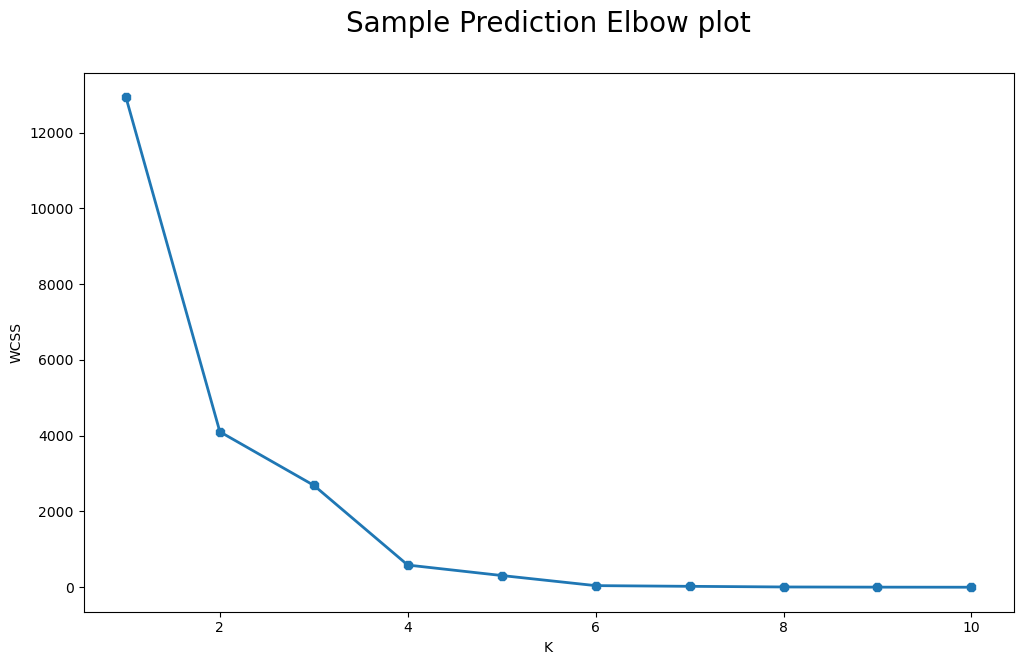

In [95]:
# Elbow plot
wcss_scaled2= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++', random_state=42)
    kmeans.fit(Y1)
    wcss_scaled2.append(kmeans.inertia_)

# Plot
plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled2, linewidth = 2, marker = '8')
plt.title('Sample Prediction Elbow plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [96]:
kmeans_scaled2 = KMeans(n_clusters=3, init = "k-means++")
kmeans_scaled2.fit(Y1)

KMeans(n_clusters=3)

In [127]:
sample_label = new_sample_test[["artist_name", "genre","release_date", "track_name"]]
sample_label = pd.concat([sample_label, clean_sample_test], axis=1)
sample_label

,artist_name,genre,release_date,track_name,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
0,godsmack,rock,1998,immune,74,0.000907,0.348191,0.375448,0.000907,0.225414,...,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286,2
1,dennis brown,reggae,1993,second chance,43,0.001224,0.029943,0.001224,0.306688,0.001224,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,6
2,the black crowes,pop,1990,sister luck,54,0.001120,0.482490,0.001120,0.001120,0.001120,...,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571,3
3,jerry lee lewis,pop,1960,your cheating heart,25,0.204740,0.002506,0.002506,0.129818,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,11
4,paul anka,pop,1966,eso beso,97,0.001170,0.001170,0.001170,0.050289,0.001170,...,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429,12
5,noro morales,jazz,1952,silencio,57,0.001462,0.487965,0.140561,0.001462,0.001462,...,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429,8
6,rage against the machine,rock,2000,pistol grip pump,152,0.000675,0.000675,0.134044,0.293819,0.000675,...,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714,5
7,taste,blues,1970,railway and gun,37,0.051874,0.001645,0.001645,0.084118,0.037341,...,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286,7
8,randy travis,country,1986,messin' with my mind,41,0.001504,0.001504,0.132148,0.492312,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,6
9,paramore,pop,2009,playing god,91,0.000711,0.543658,0.114697,0.098286,0.014720,...,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143,4


In [101]:
clean_sample_test['Cluster'].value_counts().sort_index().to_frame("Number of Songs")

,Number of Songs
Cluster,
2,1
3,1
4,1
5,1
6,2
7,1
8,1
11,1
12,1


### Cluster 6 is the only cluster with more than one song 

In [104]:
sample_label[clean_sample_test["Cluster"]== 6]

,artist_name,genre,release_date,track_name,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
1,dennis brown,reggae,1993,second chance,43,0.001224,0.029943,0.001224,0.306688,0.001224,...,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714,6
8,randy travis,country,1986,messin' with my mind,41,0.001504,0.001504,0.132148,0.492312,0.001504,...,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714,6


In [103]:
sample_label[clean_sample_test["Cluster"]== 11]

,artist_name,genre,release_date,track_name,len,dating,violence,world/life,night/time,shake the audience,...,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age,Cluster
3,jerry lee lewis,pop,1960,your cheating heart,25,0.20474,0.002506,0.002506,0.129818,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143,11


### Cluster 6
- len

- violence

- sadness 
 
- world/life
 
### Cluster 11
- age

- sadness

- dating 
 
- night/time